In [5]:
# Grundlegende Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import numpy as np
import missingno as msno

# Einstellungen für bessere Plots
plt.rcParams['figure.figsize'] = (10, 6)

# Pandas Optionen
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.4f}'.format)

# Download latest version


path = kagglehub.dataset_download("priyamchoksi/credit-card-transactions-dataset")

ds = pd.read_csv(f"{path}/credit_card_transactions.csv")

print(f"Anzahl Zeilen: {ds.shape[0]}")
print(f"Anzahl Spalten: {ds.shape[1]}")

Anzahl Zeilen: 1296675
Anzahl Spalten: 24


**Mögliche Hypothesen**:
* Fraud-Transaktionen haben im Mittel einen höheren Transaktionsbetrag als Non-Fraud-Transaktionen
* Fraud-Transaktionen sind häufiger online (statt POS) als Non-Fraud
* Fraud-Transaktionen treten signifikant häufiger nachts auf als reguläre Transaktionen.
* Fraud-Kunden haben im Schnitt mehr Transaktionen in kurzer Zeitspanne („Bursting Behavior“) als Non-Fraud-Kunden.
* Ein bestimmter Kundentyp (z. B. Altersgruppen, Kundensegmente) weist mehr Fraud-Fälle auf.
* Bestimmte Categories weisen höhere Fraud-Raten auf.

**1. Hypothese: Fraud-Transaktionen haben höheren Transaktionsbetrag als Non-Fraud**

$H_0:$ Durchschnittlicher Transaktionsbetrag zwischen Kategorien Fraud und Non-Fraud ist gleich
Alternativhypothese $H_1:$ Fraud-Transaktionen haben im Mittel höhere Beträge 

/var/folders/cd/nv3twvx12gx_b15k3sbqkn300000gn/T/ipykernel_17146/3491826981.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud_amounts, label="Non-Fraud", shade=True)
/var/folders/cd/nv3twvx12gx_b15k3sbqkn300000gn/T/ipykernel_17146/3491826981.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud_amounts, label="Fraud", shade=True)
/var/folders/cd/nv3twvx12gx_b15k3sbqkn300000gn/T/ipykernel_17146/3491826981.py:36: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nonfraud_log, label="Non-Fraud (log)", shade=True)
/var/folders/cd/nv3twvx12gx_b15k3sbqkn300000gn/T/ipykernel_17146/3491826981.py:37: FutureWarning: 


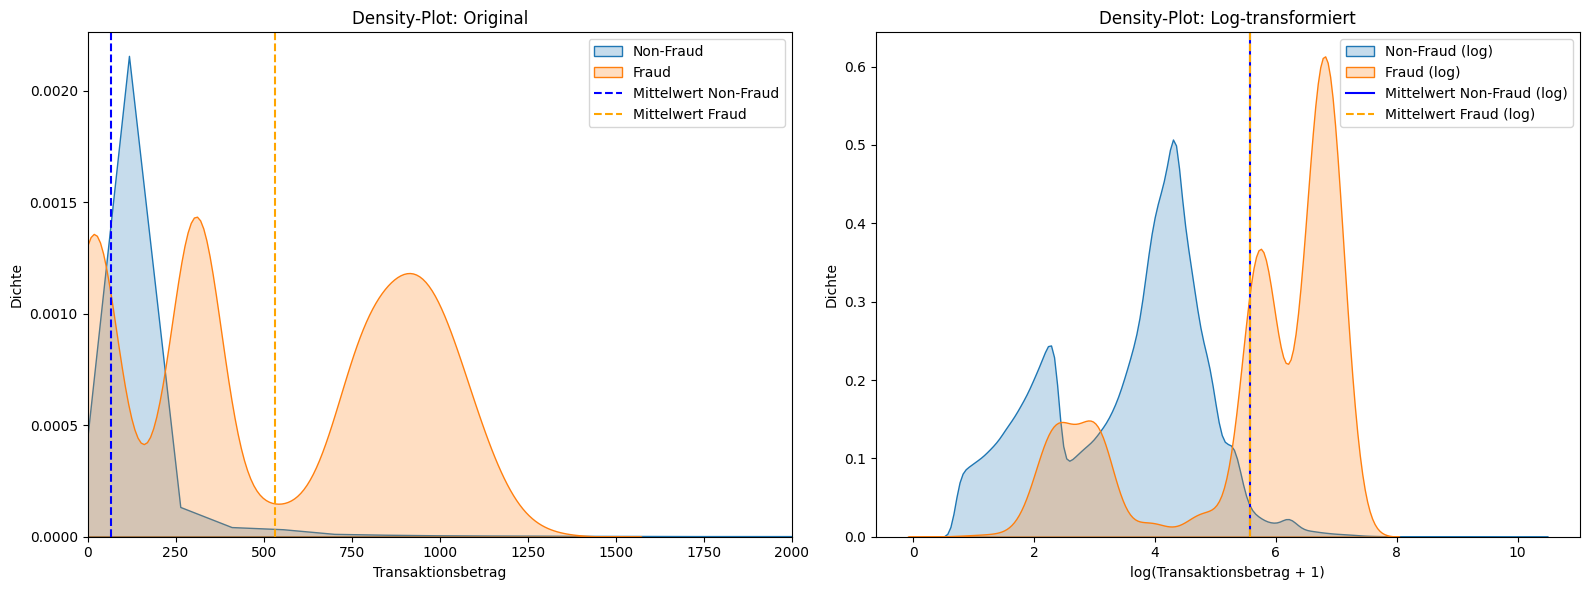

t-Statistik: 102.80470607258108
Einseitiger p-Wert: 0.0
H1 angenommen: Fraud-Transaktionen haben im Mittel höhere Beträge.


In [30]:
from scipy.stats import ttest_ind
from scipy.stats import norm

# Daten laden

# Annahme: Spalten heißen "fraud" (0 = kein Betrug, 1 = Betrug) und "amount"
fraud_amounts = ds[ds["is_fraud"] == 1]["amt"]
nonfraud_amounts = ds[ds["is_fraud"] == 0]["amt"]

# Log-Transformation
fraud_log = np.log1p(fraud_amounts)
nonfraud_log = np.log1p(nonfraud_amounts)

# Mittelwerte berechnen
mean_nonfraud = nonfraud_amounts.mean()
mean_fraud = fraud_amounts.mean()
mean_nonfraud_log = fraud_log.mean()
mean_fraud_log = fraud_log.mean()

plt.figure(figsize=(16, 6))

# Linker Plot: Original Beträge
plt.subplot(1, 2, 1)
sns.kdeplot(nonfraud_amounts, label="Non-Fraud", shade=True)
sns.kdeplot(fraud_amounts, label="Fraud", shade=True)
plt.axvline(mean_nonfraud, color='blue', linestyle='--', label='Mittelwert Non-Fraud')
plt.axvline(mean_fraud, color='orange', linestyle='--', label='Mittelwert Fraud')
plt.xlabel("Transaktionsbetrag")
plt.ylabel("Dichte")
plt.title("Density-Plot: Original")
plt.xlim(0,2000)
plt.legend()

# Rechter Plot: Log-transformierte Beträge
plt.subplot(1, 2, 2)
sns.kdeplot(nonfraud_log, label="Non-Fraud (log)", shade=True)
sns.kdeplot(fraud_log, label="Fraud (log)", shade=True)
plt.axvline(mean_nonfraud_log, color='blue', linestyle='-', label='Mittelwert Non-Fraud (log)')
plt.axvline(mean_fraud_log, color='orange', linestyle='--', label='Mittelwert Fraud (log)')
plt.xlabel("log(Transaktionsbetrag + 1)")
plt.ylabel("Dichte")
plt.title("Density-Plot: Log-transformiert")
plt.legend()

plt.tight_layout()
plt.show()

# t-Test durchführen
t_stat, p_two_sided = ttest_ind(fraud_amounts, nonfraud_amounts, equal_var=False)
if t_stat > 0:
    p_one_sided = p_two_sided / 2
else:
    p_one_sided = 1 - (p_two_sided / 2)

print("t-Statistik:", t_stat)
print("Einseitiger p-Wert:", p_one_sided)

alpha = 0.05
if p_one_sided < alpha:
    print("H1 angenommen: Fraud-Transaktionen haben im Mittel höhere Beträge.")
else:
    print("H0 kann nicht verworfen werden.")

Wir sehen, dass die $H_0$ Hypothese von unserem t-Test für zwei unabhängige Gruppen zurückgewiesen wurde. Ebenso liegt der p-Wert unter 0.05. Zusätzlich sehen wir in unseren Plots, dass der Mittelwert für Fraud-Transaktionen auch höher ist. Deswegen konkludieren wir, dass die $H_0$ Hypothese zu verwerfen ist und somit die Alternativhypothese $H_1$ stimmt. Fraud-Transaktionen haben also einen höheren Betrags-Mittelwert als die Non-Fraud-Transaktionen.